# Modeling

In [110]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, NuSVC
from sklearn.discriminant_analysis import \
    LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import \
    StratifiedKFold, GridSearchCV
from sklearn.metrics import \
    accuracy_score, precision_score, recall_score, f1_score, \
    roc_curve, precision_recall_curve, \
    roc_auc_score, average_precision_score, \
    confusion_matrix, classification_report

%matplotlib inline
plt.style.use('default')
warnings.filterwarnings("ignore")

DATA_DIR = "../data"
MODEL_DIR = "../models"

In [3]:
df = pd.read_csv(os.path.join(DATA_DIR, "df3_scaled.csv"))

In [4]:
df.head()

,transcript_id,transcript_position,nucleotides,0,1,2,3,4,5,6,7,8,gene_id,label
0,ENST00000000233,244,AAGACCA,0.011239,0.009548,0.649123,0.117647,0.050283,0.578164,0.075390,0.058543,0.281707,ENSG00000004059,0
1,ENST00000000233,244,AAGACCA,0.039294,0.011831,0.649123,0.049729,0.022461,0.627792,0.085258,0.033525,0.242683,ENSG00000004059,0
2,ENST00000000233,244,AAGACCA,0.025266,0.018581,0.448622,0.087575,0.058051,0.602978,0.032761,0.010845,0.226829,ENSG00000004059,0
3,ENST00000000233,244,AAGACCA,0.019605,0.009548,0.649123,0.048702,0.024112,0.677419,0.032761,0.019819,0.236585,ENSG00000004059,0
4,ENST00000000233,244,AAGACCA,0.042082,0.013725,0.586466,0.007335,0.018917,0.665012,0.111901,0.038148,0.258537,ENSG00000004059,0


In [5]:
df.dtypes

transcript_id           object
transcript_position      int64
nucleotides             object
0                      float64
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
8                      float64
gene_id                 object
label                    int64
dtype: object

In [6]:
# designate data types
# df['label'] = df['label'].astype(str)
df['transcript_position'] = df['transcript_position'].astype(str)

In [7]:
df.dtypes

transcript_id           object
transcript_position     object
nucleotides             object
0                      float64
1                      float64
2                      float64
3                      float64
4                      float64
5                      float64
6                      float64
7                      float64
8                      float64
gene_id                 object
label                    int64
dtype: object

## Train test split

In [8]:
X = df[['0', '1', '2', '3', '4', '5', '6', '7', '8']]
y = df['label']

In [9]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Collect models and results

In [82]:
models = []
roc_aucs = []
pr_aucs = []
precisions = []
recalls = []
f1s = []
roc_curves = []
pr_curves = []

## Naive Bayes

In [83]:
# %%time

# model = GaussianNB()
# model.fit(Xtr, ytr)

In [84]:
# with open(os.path.join(MODEL_DIR, 'nb.pickle'), 'wb') as f:
#     pickle.dump(model, f)

In [85]:
with open(os.path.join(MODEL_DIR, 'nb.pickle'), 'rb') as f:
    model = pickle.load(f)

In [86]:
yhat_probs = model.predict_proba(Xte)
yhat = model.predict(Xte)
yhat1_probs = yhat_probs[:, 1]

In [87]:
models.append('nb')
roc_aucs.append(roc_auc_score(yte, yhat1_probs))
pr_aucs.append(average_precision_score(yte, yhat))
precisions.append(precision_score(yte, yhat))
recalls.append(recall_score(yte, yhat))
f1s.append(f1_score(yte, yhat))
roc_curves.append(roc_curve(yte, yhat1_probs))
pr_curves.append(precision_recall_curve(yte, yhat1_probs))

## kNN

In [88]:
# %%time
# model = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
# model.fit(Xtr, ytr)

In [89]:
# with open(os.path.join(MODEL_DIR, 'knn.pickle'), 'wb') as f:
#     pickle.dump(model, f)

In [90]:
with open(os.path.join(MODEL_DIR, 'knn.pickle'), 'rb') as f:
    model = pickle.load(f)

In [91]:
# yhat_probs = model.predict_proba(Xte)
# yhat = model.predict(Xte)
# yhat1_probs = yhat_probs[:, 1]

In [92]:
# with open(os.path.join(MODEL_DIR, 'knn_yhat_probs.pickle'), 'wb') as f:
#     pickle.dump(yhat_probs, f)
    
# with open(os.path.join(MODEL_DIR, 'knn_yhat.pickle'), 'wb') as f:
#     pickle.dump(yhat, f)

In [93]:
with open(os.path.join(MODEL_DIR, 'knn_yhat_probs.pickle'), 'rb') as f:
    yhat_probs = pickle.load(f)
    
with open(os.path.join(MODEL_DIR, 'knn_yhat.pickle'), 'rb') as f:
    yhat = pickle.load(f)
    
yhat1_probs = yhat_probs[:, 1]

In [94]:
# %%time
# # selecting the classifier
# knn = KNeighborsClassifier(n_jobs=-1)

# # selecting hyperparameter tuning
# param = {"n_neighbors": np.arange(3, 6)}

# # defining cross validation
# cv = StratifiedKFold(n_splits=5)

# # using gridsearch for respective parameters
# gridsearch = GridSearchCV(knn, param, cv=cv, scoring="f1_macro", n_jobs=-1, verbose=2)

# # fitting the model
# gridsearch.fit(Xtr, ytr)

# # printing best score and best parameters
# print("best score is:" , gridsearch_log.best_score_)
# print("best parameters are:" , gridsearch_log.best_params_)

In [95]:
models.append('knn')
roc_aucs.append(roc_auc_score(yte, yhat1_probs))
pr_aucs.append(average_precision_score(yte, yhat))
precisions.append(precision_score(yte, yhat))
recalls.append(recall_score(yte, yhat))
f1s.append(f1_score(yte, yhat))
roc_curves.append(roc_curve(yte, yhat1_probs))
pr_curves.append(precision_recall_curve(yte, yhat1_probs))

## SVM (linear kernel)

In [ ]:
%%time
lsvc = LinearSVC()
lsvc.fit(Xtr, ytr)

In [ ]:
with open(os.path.join(MODEL_DIR, 'lsvc.pickle'), 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open(os.path.join(MODEL_DIR, 'lsvc.pickle'), 'rb') as f:
    model = pickle.load(f)

In [ ]:
yhat_probs = lsvc.predict_proba(Xte)
yhat = lsvc.predict(Xte)
yhat1_probs = yhat_probs[:, 1]

In [ ]:
# selecting the classifier
lsvc = LinearSVC()

# selecting hyperparameter tuning
param = {"C": np.exp(np.linspace(start=np.log(0.001), stop=np.log(10000), num=5))}

# defining cross validation
cv = StratifiedKFold(n_splits=5)

# using gridsearch for respective parameters
gridsearch = GridSearchCV(lsvc, param, cv=cv, scoring="f1_macro", n_jobs=-1, verbose=2)

# fitting the model
gridsearch.fit(Xtr, ytr)

# printing best score and best parameters
print("best score is:" , gridsearch_log.best_score_)
print("best parameters are:" , gridsearch_log.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [ ]:
models.append('lsvc')
roc_aucs.append(roc_auc_score(yte, yhat1_probs))
pr_aucs.append(average_precision_score(yte, yhat))
precisions.append(precision_score(yte, yhat))
recalls.append(recall_score(yte, yhat))
f1s.append(f1_score(yte, yhat))
roc_curves.append(roc_curve(yte, yhat1_probs))
pr_curves.append(precision_recall_curve(yte, yhat1_probs))

## SVM (non-linear kernel)

In [ ]:
%%time
lnusvc = LNuSVC(kernel='poly', gamma="auto")
lnusvc.fit(Xtr, ytr)

In [ ]:
with open(os.path.join(MODEL_DIR, 'lnusvc.pickle'), 'wb') as f:
    pickle.dump(model, f)

In [80]:
with open(os.path.join(MODEL_DIR, 'lnusvc.pickle'), 'rb') as f:
    model = pickle.load(f)

In [ ]:
yhat_probs = lnusvc.predict_proba(Xte)
yhat = lnusvc.predict(Xte)
yhat1_probs = yhat_probs[:, 1]

In [ ]:
models.append('lnusvc')
roc_aucs.append(roc_auc_score(yte, yhat1_probs))
pr_aucs.append(average_precision_score(yte, yhat))
precisions.append(precision_score(yte, yhat))
recalls.append(recall_score(yte, yhat))
f1s.append(f1_score(yte, yhat))
roc_curves.append(roc_curve(yte, yhat1_probs))
pr_curves.append(precision_recall_curve(yte, yhat1_probs))

## LDA

In [96]:
# %%time
# model = LinearDiscriminantAnalysis(solver='svd')
# model.fit(Xtr, ytr)

In [97]:
# with open(os.path.join(MODEL_DIR, 'lda.pickle'), 'wb') as f:
#     pickle.dump(model, f)

In [98]:
with open(os.path.join(MODEL_DIR, 'lda.pickle'), 'rb') as f:
    model = pickle.load(f)

In [99]:
yhat_probs = model.predict_proba(Xte)
yhat = model.predict(Xte)
yhat1_probs = yhat_probs[:, 1]

In [100]:
models.append('lda')
roc_aucs.append(roc_auc_score(yte, yhat1_probs))
pr_aucs.append(average_precision_score(yte, yhat))
precisions.append(precision_score(yte, yhat))
recalls.append(recall_score(yte, yhat))
f1s.append(f1_score(yte, yhat))
roc_curves.append(roc_curve(yte, yhat1_probs))
pr_curves.append(precision_recall_curve(yte, yhat1_probs))

## QDA

In [101]:
# %%time
# model = QuadraticDiscriminantAnalysis()
# model.fit(Xtr, ytr)

In [102]:
# with open(os.path.join(MODEL_DIR, 'qda.pickle'), 'wb') as f:
#     pickle.dump(model, f)

In [103]:
with open(os.path.join(MODEL_DIR, 'qda.pickle'), 'rb') as f:
    model = pickle.load(f)

In [104]:
yhat_probs = model.predict_proba(Xte)
yhat = model.predict(Xte)
yhat1_probs = yhat_probs[:, 1]

In [105]:
models.append('qda')
roc_aucs.append(roc_auc_score(yte, yhat1_probs))
pr_aucs.append(average_precision_score(yte, yhat))
precisions.append(precision_score(yte, yhat))
recalls.append(recall_score(yte, yhat))
f1s.append(f1_score(yte, yhat))
roc_curves.append(roc_curve(yte, yhat1_probs))
pr_curves.append(precision_recall_curve(yte, yhat1_probs))

## Evaluate models

nb: ROC AUC = 0.695
nb: PR AUC = 0.045
nb: Precision = 0.063
nb: Recall = 0.001
nb: F1 = 0.002
knn: ROC AUC = 0.603
knn: PR AUC = 0.062
knn: Precision = 0.254
knn: Recall = 0.079
knn: F1 = 0.120
lda: ROC AUC = 0.683
lda: PR AUC = 0.045
lda: Precision = 0.000
lda: Recall = 0.000
lda: F1 = 0.000
qda: ROC AUC = 0.720
qda: PR AUC = 0.045
qda: Precision = 0.063
qda: Recall = 0.001
qda: F1 = 0.002


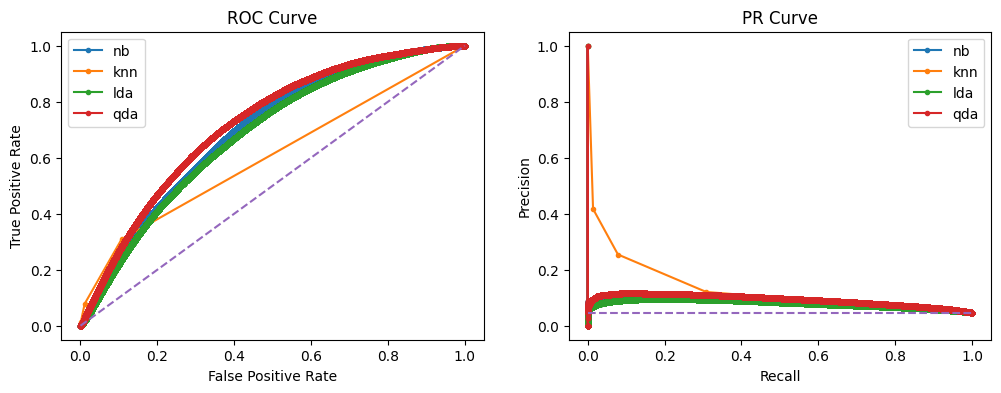

In [111]:
plt.figure(figsize=(12, 4))
random_yhat_probs = np.zeros(len(yte))
random_fpr, random_tpr, _ = roc_curve(yte, random_yhat_probs)

# relevant metrics
# roc_auc_score(yte, yhat1_probs)
# average_precision_score(yte, yhat)
# precision_score(yte, yhat)
# recall_score(yte, yhat)
# f1_score(yte, yhat)
# roc_curve(yte, yhat1_probs)
# precision_recall_curve(yte, yhat1_probs)

for model, roc_auc, pr_auc, precision, recall, f1, roc_curve, pr_curve in zip(models, roc_aucs, pr_aucs, precisions, recalls, f1s, roc_curves, pr_curves):
    print(f'{model}: ROC AUC = {roc_auc:.3f}')
    print(f'{model}: PR AUC = {pr_auc:.3f}')
    print(f'{model}: Precision = {precision:.3f}')
    print(f'{model}: Recall = {recall:.3f}')
    print(f'{model}: F1 = {f1:.3f}')


    # ROC
    fpr, tpr, _ = roc_curve

    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, marker='.', label=model)

    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()


    # PR
    precision, recall, _ = pr_curve

    plt.subplot(1, 2, 2)
    no_skill = len(yte[yte==1]) / len(yte)
    plt.plot(recall, precision, marker='.', label=model)

    plt.title('PR Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

plt.subplot(1, 2, 1)
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.subplot(1, 2, 2)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Random')
plt.show()